In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
audio_files_dir = '/content/gdrive/My Drive/UpworkNotebooks/Opera Files/'

!ls -ltra '{audio_files_dir}'/.

MessageError: ignored

In [ ]:
!pip install -q librosa
!pip install -q tensorflow_io
!pip install -q pysoundfile

In [ ]:
import os
import librosa

from IPython import display
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio

import time

%matplotlib inline

import urllib.request as urllib2 # For python3
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [ ]:
#####save file_paths and their respective subregisters in .csv file####
directory = audio_files_dir + "clean_data"
paths = [os.path.abspath(os.path.join(dirpath, file)) for dirpath,_,filenames in os.walk(directory) for file in filenames]
subregisters = [os.path.basename(os.path.normpath(dirpath)) for dirpath,_,filenames in os.walk(directory) for file in filenames]

data = pd.DataFrame()

data["path"] = paths
data["subregister"] = subregisters

classes_mapping = dict()
for num, subregister in enumerate(data["subregister"].unique()):
  classes_mapping[subregister]=num
class_id = data['subregister'].apply(lambda name: classes_mapping[name])
data = data.assign(Target=class_id)

print(data.head())

data.to_csv(audio_files_dir+ "file_paths.csv", index=False)


                                                path     subregister  Target
0  /content/gdrive/My Drive/UpworkNotebooks/Opera...  New Contraltos       0
1  /content/gdrive/My Drive/UpworkNotebooks/Opera...  New Contraltos       0
2  /content/gdrive/My Drive/UpworkNotebooks/Opera...  New Contraltos       0
3  /content/gdrive/My Drive/UpworkNotebooks/Opera...  New Contraltos       0
4  /content/gdrive/My Drive/UpworkNotebooks/Opera...  New Contraltos       0


In [ ]:
data = pd.read_csv(audio_files_dir + "file_paths.csv")
data.head()
# for path in data['path']:



,path,subregister,Target
0,/content/gdrive/My Drive/UpworkNotebooks/Opera...,New Contraltos,0
1,/content/gdrive/My Drive/UpworkNotebooks/Opera...,New Contraltos,0
2,/content/gdrive/My Drive/UpworkNotebooks/Opera...,New Contraltos,0
3,/content/gdrive/My Drive/UpworkNotebooks/Opera...,New Contraltos,0
4,/content/gdrive/My Drive/UpworkNotebooks/Opera...,New Contraltos,0


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


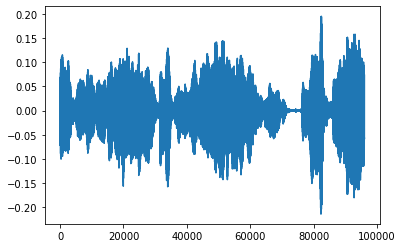

In [ ]:
def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    wav, sample_rate = librosa.load(filename)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav.numpy()

wav = load_wav_16k_mono(data['path'][0])
plt.figure()
plt.plot(wav)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


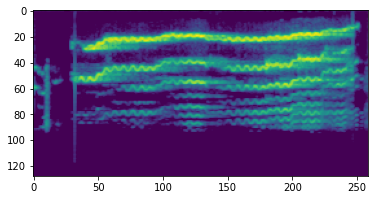

In [ ]:
y, sr = librosa.load(data['path'][2575])
#2265,1900
S = librosa.feature.melspectrogram(y, sr=sr)
log_s = librosa.power_to_db(S, ref=np.max)
plt.figure()
# plt.plot(signal)
plt.imshow(log_s)


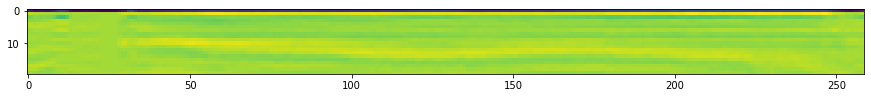

In [ ]:
mfcc = librosa.feature.mfcc(S=log_s, n_mfcc=20)
plt.figure(figsize=(15,10))
plt.imshow(mfcc)

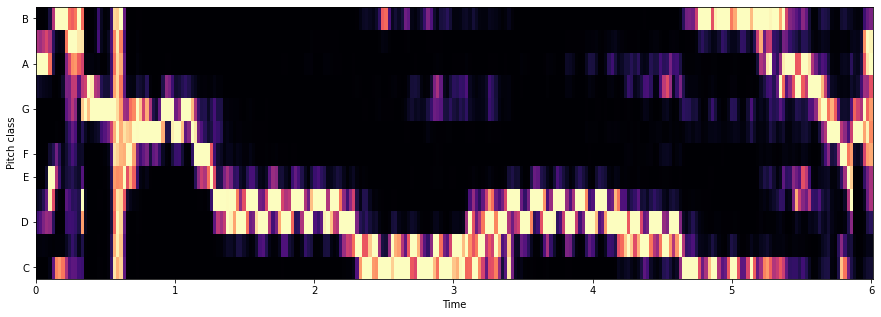

In [ ]:
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma")


In [ ]:
print(len(chromagram))
x = sum([sum(chromagram[i]) for i in range(len(chromagram))])/len(chromagram)
print(x)

12
50.60957515602454


In [ ]:
for j in range(1776, 1795):
  y, sr = librosa.load(data['path'][j])
  chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
  print(len(chromagram))
  x = sum([sum(chromagram[i]) for i in range(len(chromagram))])/len(chromagram)
  print(x)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
71.79313377949681


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
78.46499717109766


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
63.92284564238313


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
73.072221489759


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
91.36819828684868


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
80.85051901762684


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
73.03517046872246


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
71.40054638292834


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
56.07504199395468


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
65.27774542083596


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
62.960643653874286


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
102.54736789946521


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
63.31394005837501


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
65.05660805154669


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
70.46721450973564


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
62.95227642641718


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
101.81936919126504


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
73.05610709623822


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


12
67.7534712328561


In [ ]:
for j in range(2400, 2419):
  y, sr = librosa.load(data['path'][j])
  y_harmonic, y_percussive = librosa.effects.hpss(y=y)
  tempo, beats= librosa.beat.beat_track(y=y_percussive, sr=sr)
  print(tempo)
# print(beats)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


123.046875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


112.34714673913044


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


57.421875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


151.99908088235293


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


20.671875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


129.19921875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


143.5546875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


71.77734375


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


123.046875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


143.5546875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


73.828125


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


49.69200721153846


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


129.19921875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


123.046875


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


135.99917763157896


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


43.79634533898305


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


83.35433467741936


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


184.5703125


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


39.15127840909091


In [ ]:
print(data["path"][0:10])

0    /content/gdrive/My Drive/UpworkNotebooks/Opera...
1    /content/gdrive/My Drive/UpworkNotebooks/Opera...
2    /content/gdrive/My Drive/UpworkNotebooks/Opera...
3    /content/gdrive/My Drive/UpworkNotebooks/Opera...
4    /content/gdrive/My Drive/UpworkNotebooks/Opera...
5    /content/gdrive/My Drive/UpworkNotebooks/Opera...
6    /content/gdrive/My Drive/UpworkNotebooks/Opera...
7    /content/gdrive/My Drive/UpworkNotebooks/Opera...
8    /content/gdrive/My Drive/UpworkNotebooks/Opera...
9    /content/gdrive/My Drive/UpworkNotebooks/Opera...
Name: path, dtype: object


In [ ]:
def extract_features(file_name):
  audio, sample_rate = librosa.load(file_name) 
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
  mfccs_processed = np.mean(mfccs.T,axis=0)
  mfccs_processed = list(mfccs_processed)
  return mfccs_processed

mfcc_featuresdf = pd.DataFrame()
mfcc_featuresdf["mfccs"] = list(map(extract_features, data["path"]))
mfcc_featuresdf["class_label"] = data["Target"]

mfcc_featuresdf["mfccs"]
mfcc_featuresdf.to_csv(audio_files_dir+ "mfccs_crsp.csv", index=False)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
# mfcc_featuresdf2["mfccs"][0]
mfcc_featuresdf["mfccs"][0:3]
mfcc_featuresdf["class_label"][0:3]
mfcc_featuresdf.head()

,mfccs,class_label
0,"[-431.16858, 103.896614, -102.10099, -1.697079...",0
1,"[-488.06546, 68.53992, -48.404495, 44.384087, ...",0
2,"[-481.08093, 74.315056, -82.79745, 46.000492, ...",0
3,"[-454.92014, 83.85675, -97.635124, 11.414613, ...",0
4,"[-376.41104, 77.70868, -100.38663, -16.77653, ...",0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
X = np.array(mfcc_featuresdf.mfccs.tolist())
y = np.array(mfcc_featuresdf.class_label.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

num_labels = yy.shape[1]
print(num_labels)
filter_size = 2

18


ValueError: ignored

In [ ]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.05),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(num_labels, activation='softmax')
], name='my_model')

my_model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 18)                4626      
Total params: 103,442
Trainable params: 103,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(loss='categorical_crossentropy',
                 optimizer="adam",
                 metrics=['accuracy'])


In [ ]:
history = my_model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))

# from keras.callbacks import ModelCheckpoint 
# from datetime import datetime 
# num_epochs = 100
# num_batch_size = 32
# model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 8.0596 - accuracy: 0.1409 - val_loss: 2.7398 - val_accuracy: 0.2272
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 3.5302 - accuracy: 0.2250 - val_loss: 2.3882 - val_accuracy: 0.3453
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 2.6938 - accuracy: 0.2867 - val_loss: 1.9660 - val_accuracy: 0.3757
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 2.2306 - accuracy: 0.3408 - val_loss: 1.7764 - val_accuracy: 0.4114
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 1.8956 - accuracy: 0.3962 - val_loss: 1.6784 - val_accuracy: 0.4454
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 1.7129 - accuracy: 0.4463 - val_loss: 1.6746 - val_accuracy: 0.4097
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 1.5381 - accuracy: 0.4826 - val_loss: 1.4878 - val_accuracy: 0.4794
Epoch 8/100
7

In [ ]:
def model_performance(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  pass

In [ ]:
# loss, accuracy = my_model.evaluate(x_test, y_test)
# # print(x_test[0])
# print("Loss: ", loss)
# print("Accuracy: ", accuracy)

print(my_model.predict(x_test)[5].argmax())

8


In [ ]:
# Display model architecture summary 
my_model.summary()
# Calculate pre-training accuracy 
score = my_model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 18)                462

RuntimeError: ignored

In [ ]:

mfcc_featuresdf = pd.DataFrame()
mfcc_featuresdf["mfccs"] = list(map(extract_features, data["path"]))
mfcc_featuresdf["class_label"] = data["Target"]

mfcc_featuresdf.to_csv(audio_files_dir+ "mfccs_crsp.csv", index=False, )

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")

In [ ]:
from ast import literal_eval

x = pd.read_csv(audio_files_dir + "mfccs_crsp.csv")
df = pd.read_csv(audio_files_dir + "mfccs_crsp.csv")


# literal_eval(x.iloc[0]['mfccs'])
# np.array(x["mfccs"][0])
df["mfccs"][0]
# data = pd.read_csv(audio_files_dir + "file_paths.csv")
# data.head()
# literal_eval(df["mfccs"][0])


'[-4.31168579e+02  1.03896614e+02 -1.02100990e+02 -1.69707942e+00\n  1.67032700e+01 -4.72944565e+01 -6.94619083e+00 -9.85520458e+00\n -4.71353836e+01 -1.55539017e+01 -8.40423870e+00 -3.01989994e+01\n -2.05377712e+01 -1.40079594e+01 -9.20800114e+00  5.80514193e+00\n  8.38218307e+00  1.27614202e+01  2.05251942e+01  1.21917028e+01\n  2.12721014e+00  2.70308256e+00  4.32430649e+00  3.39790416e+00\n  4.41323900e+00  3.55585289e+00 -5.18094635e+00 -1.07599859e+01\n -7.48855543e+00 -4.94591093e+00 -1.02681971e+00  2.19549704e+00\n -1.97792888e+00 -4.81278002e-01  5.60481787e+00  2.26426840e+00\n  5.67464352e-01  4.47031593e+00  1.19868302e+00 -5.49997807e+00\n -6.76194668e+00 -2.81853461e+00  7.16682076e-02 -2.65116119e+00\n -1.61748469e+00  3.80514884e+00  2.44304523e-01 -3.16868210e+00\n  2.25627351e+00  2.37024069e+00 -4.56976116e-01  3.00270200e+00\n  2.78520846e+00 -5.28830945e-01  1.11355352e+00  9.00382161e-01\n -4.64617729e-01  1.94228065e+00  1.45212579e+00 -6.34911537e-01\n  3.83603

In [ ]:
def pitch(signal, sr=96000, max_pad_len=188):
    pitches, _ = librosa.piptrack(y=signal, sr=sr, n_fft=1000)
    while len(pitches[0]) < max_pad_len:
        gap = max_pad_len - len(pitches[0]) if (max_pad_len - len(pitches[0]) < len(pitches[0])) else len(pitches[0])
        pitches_2_rpt = pitches[:, (len(pitches[0]) - gap):len(pitches[0])]
        pitches = np.concatenate((pitches, pitches_2_rpt), axis=1)
        pitches = np.mean(pitches, axis=0)
    
    return pitches


In [ ]:
def get_spectrogram(waveform):
    spectrogram = tf.signal.stft(
        waveform, frame_length=255, frame_step=128)

    # removes the phase (we only care about the magnitude)
    spectrogram = tf.abs(spectrogram)
    print('Waveform shape:', waveform.shape)
    print('Spectrogram shape:', spectrogram.shape)
    
    return spectrogram


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(501, 385)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(501, 385)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(501, 385)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(501, 385)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(501, 385)


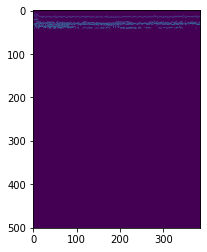

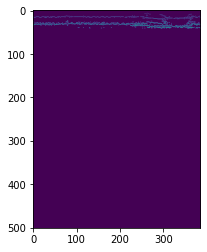

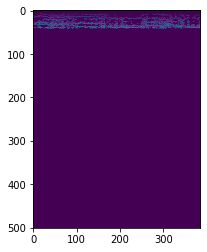

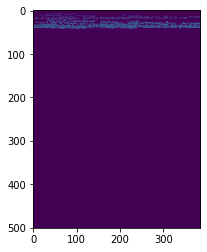

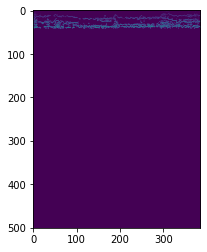

In [ ]:
for i in range(5):
  signal = load_wav_16k_mono(data['path'][i])
  pitches = pitch(signal=signal)

  print(pitches.shape)
  plt.figure()
  # plt.plot(signal)
  plt.imshow(pitches)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

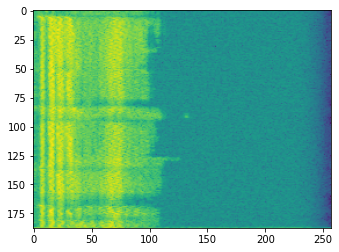

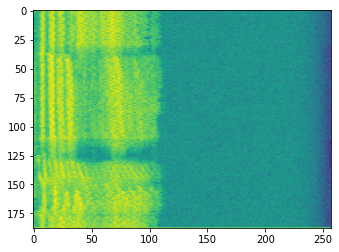

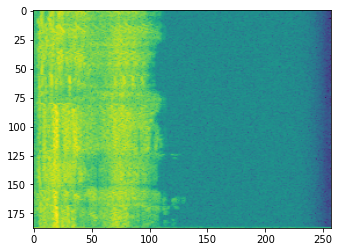

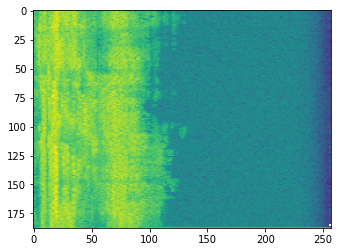

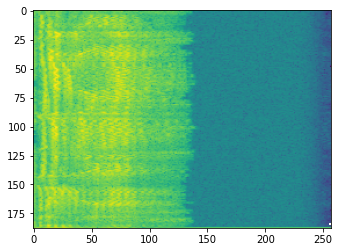

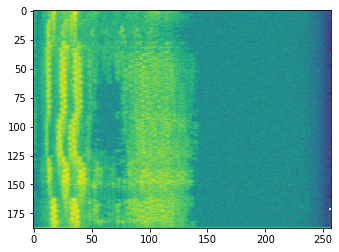

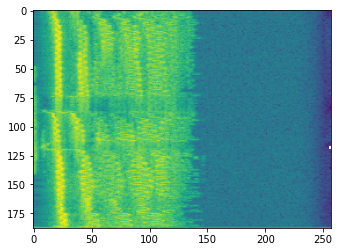

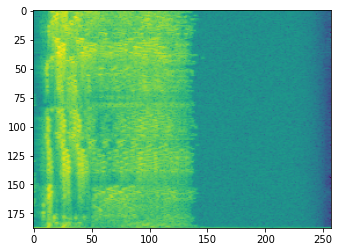

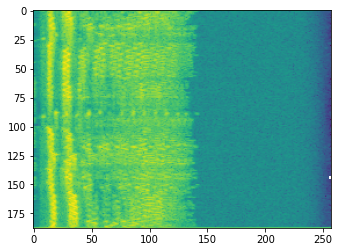

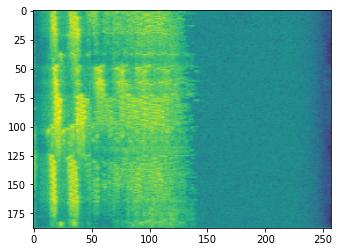

In [ ]:
# Convert to spectrogram
for i in range(5):
  signal = load_wav_16k_mono(data['path'][i])
  spectrogram = tfio.audio.spectrogram(signal, nfft=512, window=512, stride=512)
  plt.figure()
  plt.imshow(tf.math.log(spectrogram).numpy())

for i in range(2385,2390):
  signal = load_wav_16k_mono(data['path'][i])
  spectrogram = tfio.audio.spectrogram(signal, nfft=512, window=512, stride=512)

  plt.figure()
  plt.imshow(tf.math.log(spectrogram).numpy())

In [ ]:

classes_mapping = dict()
for num, subregister in enumerate(data["subregister"].unique()):
  classes_mapping[subregister]=num

class_id = data['subregister'].apply(lambda name: classes_mapping[name])
data = data.assign(Target=class_id)

print(data[200:205])



{'Baritones_BassBaritone': 0, 'Baritones_Dramatic': 1, 'Baritones_Lyric': 2, 'Bass_cantante': 3, 'Bass_dramatic': 4, 'New Contraltos': 5, 'New Countertenor': 6, 'Mezzosoprano_Dramatic': 7, 'Mezzosoprano_Lyric': 8, 'Tenor_Dramatic': 9, 'Tenor_Leggero': 10, 'Tenor_Lyric': 11, 'Tenor_Spinto': 12, 'Soprano_Coloratura': 13, 'Soprano_Dramatic': 14, 'Soprano_Lyric': 15, 'Soprano_Soubrette': 16, 'Soprano_Spinto': 17}
                                                  path  ... Target
200  /content/gdrive/My Drive/UpworkNotebooks/Opera...  ...      1
201  /content/gdrive/My Drive/UpworkNotebooks/Opera...  ...      1
202  /content/gdrive/My Drive/UpworkNotebooks/Opera...  ...      1
203  /content/gdrive/My Drive/UpworkNotebooks/Opera...  ...      1
204  /content/gdrive/My Drive/UpworkNotebooks/Opera...  ...      1

[5 rows x 3 columns]
